#### Thực hành biên tập và truy cập dữ liệu dạng mảng trên numpy

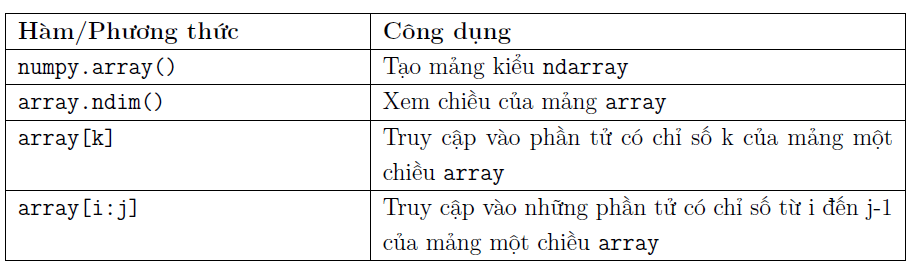

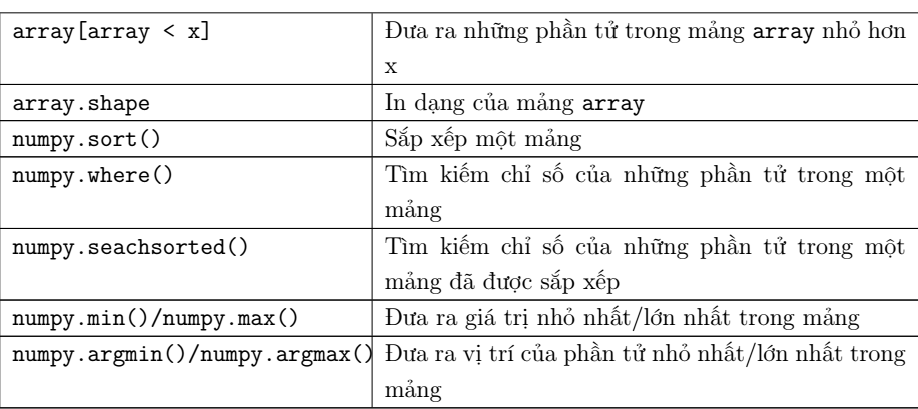

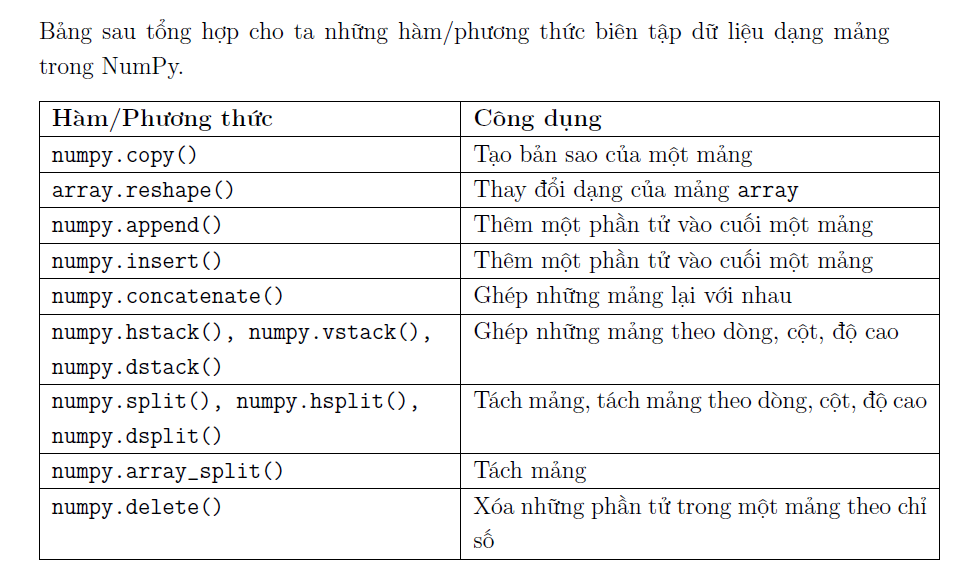



#### Bài 1. 

Giả sử bạn theo dõi số tiền (đơn vị nghìn đồng) trong hóa đơn điện thoại
hàng tháng theo thứ tự từ tháng 1 đến tháng 12 trong năm vừa qua như sau:

198 185 223 221 207 203 180 195 222 177 214 216

a. Nhập dữ liệu thành một vec tơ có tên tien_dt.

b. Tính tổng số tiền bạn phải trả cho phí điện thoại trong năm đó.

c. Cho biết tháng nào có số tiền ít (nhiều) nhất và số tiền là bao nhiêu?

d. Cho biết những tháng bạn phải trả hơn 200 nghìn tiền điện thoại. Có bao nhiêu
tháng như thế?

e. Tính xem có bao nhiêu tháng mà tiền điện thoại không quá 190 nghìn.

f. Tính xem có bao nhiêu tháng mà tiền điện thoại dao động trong khoảng
[190, 210] nghìn.

g. Tính số tiền điện thoại trung bình một tháng.

In [1]:
#Nhập numpy và đặt bí danh là np
import numpy as np

In [3]:
#a. Nhập dữ liệu thành một vec tơ có tên tien_dt.
tien_dt = np.array([198, 185, 223, 221, 207, 203, 180, 195, 222, 177, 214, 216])
tien_dt

array([198, 185, 223, 221, 207, 203, 180, 195, 222, 177, 214, 216])

In [4]:
#b. Tính tổng số tiền bạn phải trả cho phí điện thoại trong năm đó.
np.sum(tien_dt)
#hoặc
sum(tien_dt)

2441

In [5]:
#c. Cho biết tháng nào có số tiền ít (nhiều) nhất và số tiền là bao nhiêu?
max_dt = max(tien_dt)
print("Số tiền nhiều nhất là:", max_dt)
min_dt = min(tien_dt)
print("Số tiền ít nhất là:", min_dt)
print("Thang dung nhieu tien dien thoai nhat la:" , np.argmax(tien_dt)+1)
print("Thang dung it tien dien thoai nhat la:" , np.argmin(tien_dt)+1)

Số tiền nhiều nhất là: 223
Số tiền ít nhất là: 177
Thang dung nhieu tien dien thoai nhat la: 3
Thang dung it tien dien thoai nhat la: 10


In [6]:
#d. Cho biết những tháng bạn phải trả hơn 200 nghìn tiền điện thoại. Có bao nhiêu tháng như thế?

np.where(tien_dt > 200) # Cho biết vị trí trong tien_dt có giá trị trên 200


(array([ 2,  3,  4,  5,  8, 10, 11], dtype=int64),)

In [11]:
np.ndim(np.where(tien_dt > 200)) #mảng 2 chiều

2

In [12]:
np.where(tien_dt > 200)[0]

array([ 2,  3,  4,  5,  8, 10, 11], dtype=int64)

In [ ]:
#Tháng trả trên 200k tiền điện thoại là:
np.where(tien_dt > 200)[0] + 1 # đánh số trong numpy bắt đầu từ 0

In [14]:
# Câu d cũng có thể làm như sau.
# Câu d
count = 0
for i in range(len(tien_dt)):
    if tien_dt[i] > 200:
        count += 1
        print(i+1)
print("số tháng trên 200:", count)
    

3
4
5
6
9
11
12
số tháng trên 200: 7


In [16]:
#e. Tính xem có bao nhiêu tháng mà tiền điện thoại không quá 190 nghìn.
print("Số tháng không quá 190k là:", np.sum(tien_dt <= 190))

Số tháng không quá 190k là: 3


In [17]:
#Câu e cũng có thể làm như sau.
count = 0
for i in range(len(tien_dt)):
    if tien_dt[i] <= 190:
        count += 1
print("Số tháng không vượt quá 190:", count)

Số tháng không vượt quá 190: 3


In [25]:
#f. Tính xem có bao nhiêu tháng mà tiền điện thoại dao động trong khoảng [190, 210] nghìn.
print('Những tháng có tiền điện thoại từ 190-210 là:',
      np.where((tien_dt >= 190) & (tien_dt <= 210))[0] + 1)
print('Những tháng có tiền điện thoại từ 190-210 là:',
      np.sum((tien_dt >= 190) & (tien_dt <= 210)))

Những tháng có tiền điện thoại từ 190-210 là: [1 5 6 8]
Những tháng có tiền điện thoại từ 190-210 là: 4


In [26]:
#Câu f cũng có thể làm như sau.
count = 0
for i in range(len(tien_dt)):
    if 190 <= tien_dt[i] and tien_dt[i] <= 210:
        count += 1
print("Số tháng từ 190 đến 210:", count)

Số tháng từ 190 đến 210: 4


In [30]:
#g. Tính số tiền điện thoại trung bình một tháng.
tien_tb = np.sum(tien_dt)/len(tien_dt)
print('Tiền điện thoại trung bình là:', tien_tb)
#hoặc
print('Tiền điện thoại trung bình là:', np.mean(tien_dt))

Tiền điện thoại trung bình là: 203.41666666666666
Tiền điện thoại trung bình là: 203.41666666666666


#### Bài 2.
Dùng dữ liệu tien_dt trên để thực hiện tiếp những yêu cầu sau:

a. Sửa tiền điện thoại tháng 2 thành 175.

b. Nhập thêm vào dãy trên tiền điện thoại của 3 tháng tiếp theo nhưng bạn quên
mất số tiền tháng thứ 13, biết tháng thứ 14, 15 số tiền lần lượt là 201, 185.
Sau đó tính lại số tiền trung bình bạn phải trả mỗi tháng.

In [33]:
#a. Sửa tiền điện thoại tháng 2 thành 175.
tien_dt1 = tien_dt # tạo file tiền điện thoại là bản sao của file cũ
tien_dt1[1] = 175
tien_dt1

array([198, 175, 223, 221, 207, 203, 180, 195, 222, 177, 214, 216])

In [34]:
#b. Nhập thêm tiền vào tien_dt1
tien_them = [None , 201 , 185] # dữ liệu khuyết thiếu (missing value) để là None
tien_dt2 = np.append(tien_dt1, tien_them)
print(tien_dt2)

[198 175 223 221 207 203 180 195 222 177 214 216 None 201 185]


In [46]:
#Ta cũng có thể làm như sau
tien_them = np.array([np.nan , 201 , 185]) # dữ liệu khuyết thiếu trong numpy là nan, NaN, NAN
tien_dt3 = np.concatenate([tien_dt1, tien_them])
print(tien_dt3)

[198. 175. 223. 221. 207. 203. 180. 195. 222. 177. 214. 216.  nan 201.
 185.]


In [52]:
#Tính trung bình tiền điện thoại sau khi nhập thêm
#np.mean(tien_dt2) bị lỗi do có giá trị khuyết thiếu
#Loại bỏ giá trị khuyết thiếu
tien_dt_new = np.delete(tien_dt2, np.where(tien_dt2==None))
print(tien_dt_new)
np.mean(tien_dt_new)

[198 175 223 221 207 203 180 195 222 177 214 216 201 185]


201.21428571428572

In [58]:
#Tính trung bình tiền điện thoại sau khi nhập thêm
#np.mean(tien_dt2) bị lỗi do có giá trị khuyết thiếu
#Loại bỏ giá trị khuyết thiếu
tien_dt_new = np.delete(tien_dt3, np.where(tien_dt3==np.nan)) #không loại bỏ được!!
print(tien_dt_new)
np.mean(tien_dt_new)

[198. 175. 223. 221. 207. 203. 180. 195. 222. 177. 214. 216.  nan 201.
 185.]


nan

In [66]:
#Loại bỏ số liệu khuyết thiếu np.nan
np.isnan(tien_dt3) #Kiểm tra số liệu khuyết thiếu
print(np.isnan(tien_dt3))
~np.isnan(tien_dt3) #~ dấu phủ định 
print(~np.isnan(tien_dt3))
tien_dt_new = tien_dt3[~np.isnan(tien_dt3)] #lấy những số liệu không khuyết thiếu
print(tien_dt_new)
print(np.mean(tien_dt_new))

[False False False False False False False False False False False False
  True False False]
[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True]
[198. 175. 223. 221. 207. 203. 180. 195. 222. 177. 214. 216. 201. 185.]
201.21428571428572
